In [4]:
# 225150200111004_1 HAIKAL THORIQ ATHAYA_1
# 225150200111008_2 MUHAMMAD ARSYA ZAIN YASHIFA_2
# 225150201111001_3 JAVIER AAHMES REANSYAH_3
# 225150201111003_4 MUHAMMAD HERDI ADAM_4

In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rean3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rean3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rean3\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
df = pd.read_csv("../Data/tripadvisor_hotel_reviews.csv")
print("First 5 records:")
display(df.head())

First 5 records:


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [7]:
def standardize_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"http", "", text)
    text = re.sub(r"@/S+", "", text)
    text = re.sub(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ", text)
    text = text.replace("@", " at ")
    return text.lower()

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [9]:
def preprocess_review(text):
    text = standardize_text(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [10]:
df['Cleaned_Review'] = df['Review'].apply(preprocess_review)
print("First 5 cleaned reviews:")
display(df[['Review', 'Cleaned_Review']].head())

First 5 cleaned reviews:


,Review,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,nice room 4 experience hotel monaco seattle go...
3,"unique, great stay, wonderful time hotel monac...","unique , great stay , wonderful time hotel mon..."
4,"great stay great stay, went seahawk game aweso...","great stay great stay , went seahawk game awes..."


In [11]:
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)

X = df['Cleaned_Review']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=10000, tokenizer=word_tokenize)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Shape of training TF-IDF matrix: {X_train_tfidf.shape}")

c:\Users\rean3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Shape of training TF-IDF matrix: (16392, 10000)


In [13]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Test Accuracy: 90.63%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.72      0.80      1057
    Positive       0.91      0.97      0.94      3042

    accuracy                           0.91      4099
   macro avg       0.90      0.84      0.87      4099
weighted avg       0.91      0.91      0.90      4099



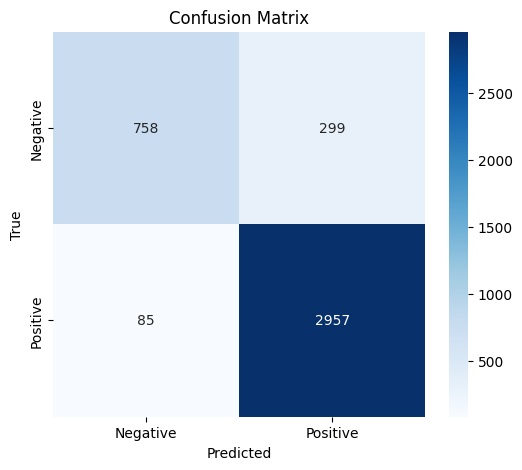

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()